# Sigmoid, Cross Entropy and Negative Log Likelihood
In this notebook we will see the following:
1. Role of bias parameter in Sigmoid function. Although seems trivial but it is very important detail. 
2. Similarities between cross entropy and negative log likelihood functions.
3. Understand how will logisitic regression behave in simple one dimensional setting. If you fit a threshold function you just need one parameter but with logistic regression you will need a minimum of two parameters if the decision boundary is not at 0.
4. It will also shed light on why it leads to high magnitude of weights and how does its confidence (p(y|x)) look in different regions at differnt stages of learning.


In [1]:
from math import exp, log 
import matplotlib.pyplot as plt 
import numpy as np 

def sigmoid(w,z,b=0):
    return 1/(1+exp(-w*z-b))


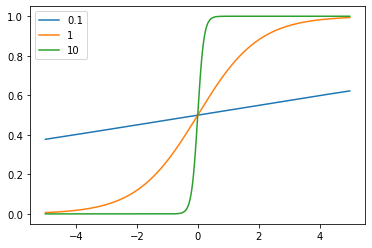

In [2]:
x = np.arange(-5,5,0.01)
w = 1
y1 = [sigmoid(0.1,z) for z in x]
plt.plot(x,y1,label='0.1')
y2 = [sigmoid(1,z) for z in x]
plt.plot(x,y2,label='1')
y3 = [sigmoid(10,z) for z in x]
plt.plot(x,y3,label='10')
plt.legend()

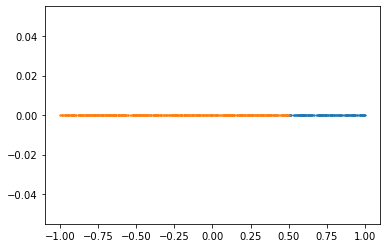

In [7]:
X = np.random.uniform(-1,1,1000)
w_star = 0.5
Y = [1 if X[i]>=w_star else 0 for i in range(len(X))]
Y = np.array(Y)
Xp = X[Y==1]
Xn = X[Y==0]
plt.scatter(Xp, [0]*len(Xp),s=1)
plt.scatter(Xn, [0]*len(Xn),s=1)

In [8]:
#cross entropy loss
def cross_entropy(p,y):
    # p = P(y=1|x)
    return - y *log(p) - (1-y) * log(1-p) 

def cross_entropy_loss(w,X,Y):
    n = len(X)
    P = []
    for i in range(n):
        p = sigmoid(w,X[i])
        #if(Y[i]==0):
        #    p= 1-p
        P.append(p)
    C = [cross_entropy(P[i],Y[i]) for i in range(n)]
    return (1/n)*sum(C )
cross_entropy_loss(2,x,Y)



2.6567438299161896

In [9]:
def nll_loss(w,X,Y):
    P = []
    n = len(X)
    for i in range(n):
        p = sigmoid(w,X[i])
        if(Y[i]==0):
            p= 1-p
        P.append(p)
    nll = sum([-log(p) for p in P] )
    nll = (1/n)*nll 
    return nll 


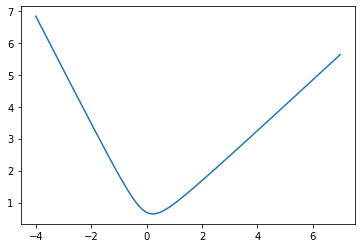

In [10]:
w_star = 4
X = np.arange(-5,5,0.01)
Y = np.array([1 if z > w_star else 0 for z in X]) 


lst_w = np.arange(-4,7,0.01)
C = [nll_loss(w,X,Y) for w in lst_w]
plt.plot(lst_w,C)

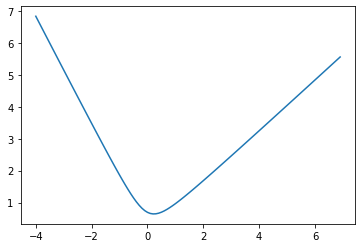

In [11]:
lst_w = np.arange(-4,7,0.1)
C = [cross_entropy_loss(w,X,Y) for w in lst_w]
plt.plot(lst_w,C)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [18]:
lr = LogisticRegression(fit_intercept=False) 
X_ = X[:,np.newaxis]
lr.fit(np.array(X_),Y)
print(lr.coef_,lr.intercept_)
Y_ = lr.predict(X_)
accuracy_score(Y_,Y)

[[0.22859814]] [0.]


0.6

In [19]:
lr = LogisticRegression(fit_intercept=True) 
X_ = X[:,np.newaxis]
lr.fit(np.array(X_),Y)
print(lr.coef_,lr.intercept_)
Y_ = lr.predict(X_)
accuracy_score(Y_,Y)

[[5.44676392]] [-21.81885055]


1.0